In [66]:
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import numpy as np

In [4]:
pytrend = TrendReq()

In [5]:
df = pytrend.trending_searches(pn='india')

In [6]:
df

,0
0,Virat Kohli
1,Nepal Plane Crash
2,IND vs SL 2nd ODI
3,Indian Army Day 2023
4,Sachin Tendulkar
5,Goa
6,Arsenal
7,Tottenham vs Arsenal
8,UFC
9,Man United vs Man City


In [8]:
# Lets analyze the top most search-Viratkohlib

In [14]:
# lets extract the keywords related to viratkholi
keywords = pytrend.suggestions(keyword='Virat Kohli')
df = pd.DataFrame(keywords)
df = df.drop(columns='mid')
df



,title,type
0,Virat Kohli,Cricketer
1,Winning Like Virat: Think & Succeed Like Kohli,Book by Abhirup Bhattacharya
2,Stargazing: The Players in My Life,Book by Ravi Shastri


In [21]:
# Historical Hourly Interest
kw_list = ['Virat Kohli']
df = pytrend.interest_by_region(resolution='COUNTRY', inc_low_vol=True, inc_geo_code=False)
df

,Virat Kohli
geoName,
Afghanistan,14
Albania,0
Algeria,0
American Samoa,0
Andorra,0
...,...
Western Sahara,0
Yemen,0
Zambia,2


<AxesSubplot:xlabel='geoName'>

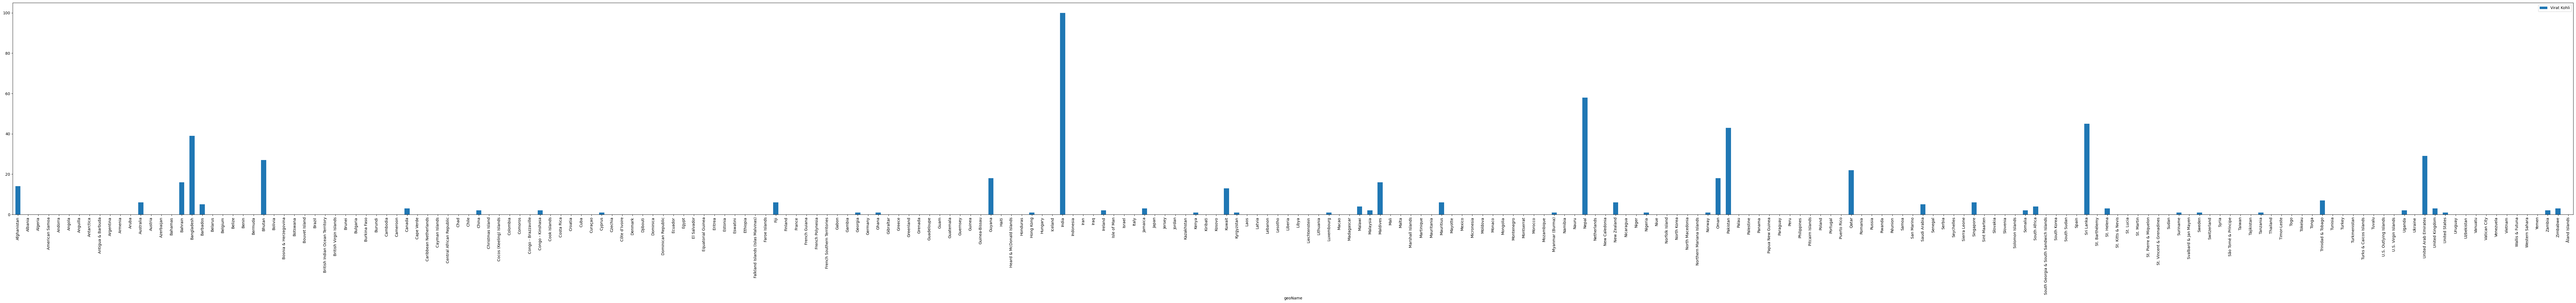

In [22]:
# Depecting the searches of virat kohli by bar graph
df.reset_index().plot(x='geoName',y='Virat Kohli',figsize=(120,10),kind='bar')

In [35]:
# Multirange Interest Over Time
pytrend.build_payload(kw_list=['virat Kohli', 'ODI'], timeframe=['2022-09-04 2022-09-10', '2022-09-18 2022-09-24'])
df = pytrend.multirange_interest_over_time()
df

,[0] virat Kohli date,[0] virat Kohli value,[1] ODI date,[1] ODI value
0,Average,41,Average,15
1,"Sep 4, 2022",40,"Sep 18, 2022",13
2,"Sep 5, 2022",19,"Sep 19, 2022",8
3,"Sep 6, 2022",25,"Sep 20, 2022",10
4,"Sep 7, 2022",12,"Sep 21, 2022",17
5,"Sep 8, 2022",100,"Sep 22, 2022",19
6,"Sep 9, 2022",66,"Sep 23, 2022",14
7,"Sep 10, 2022",28,"Sep 24, 2022",22


In [125]:
# reading dataset-> DataFrameb
df=pd.read_csv('Documents\Virat.csv')
df

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08
...,...,...,...,...,...,...,...,...,...,...,...,...
127,45,64,51,2,1,88.23,3,caught,2,v New Zealand,Ranchi,26-Oct-16
128,65,152,76,2,1,85.52,3,caught,1,v New Zealand,Visakhapatnam,29-Oct-16
129,122,147,105,8,5,116.19,3,caught,2,v England,Pune,15-Jan-17
130,8,6,5,2,0,160,3,caught,1,v England,Cuttack,19-Jan-17


In [90]:
runs = df["Runs"]
runs

0       12
1       37
2       25
3       54
4       31
      ... 
127     45
128     65
129    122
130      8
131     55
Name: Runs, Length: 132, dtype: int64

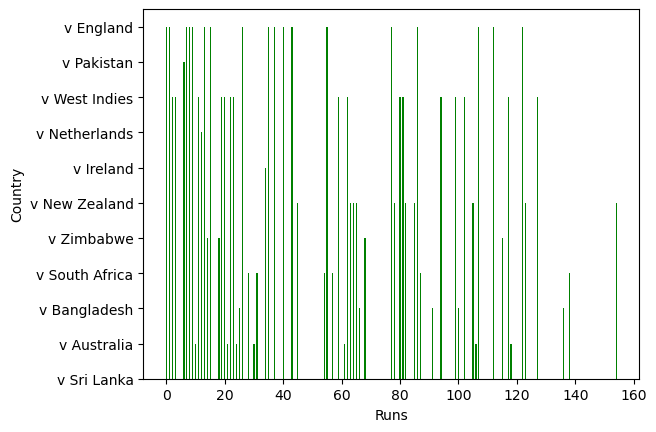

In [94]:
opp = df["Opposition"]
x=np.array(runs)
x = list(map(int, x))
y=np.array(opp)
plt.bar(x,y,color='green',width=0.4)
plt.xlabel("Runs")
plt.ylabel("Country")
plt.show()


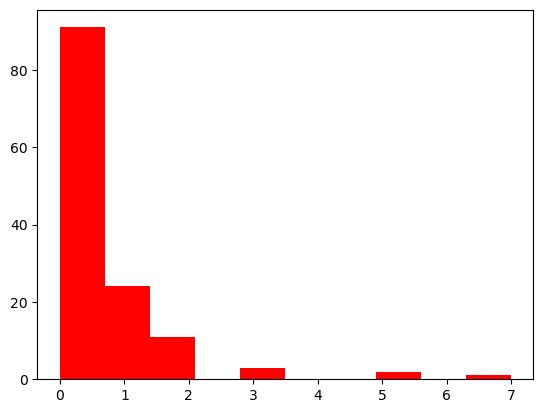

In [105]:
# number of sixes
six  = df["6s"]
z = np.array(six)
w = list(map(int,z))
plt.hist(w,color='red')
plt.show()

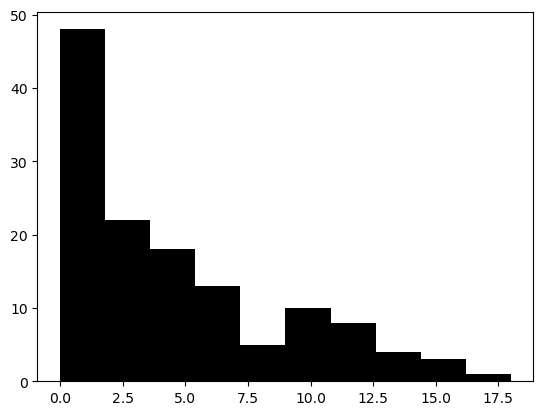

In [121]:
# number of  fours
fours =  df["4s"]
z=np.array(fours)
w=list(map(int,z))
plt.hist(w,color='black')
plt.show()

([<matplotlib.patches.Wedge at 0x1e1c6a2a1f0>,
 [Text(1.0461621663333946, 0.3399186987098808, 'lbw'),
  Text(0.33991867422268784, 1.0461621742897658, 'caught'),
  Text(-1.0461621902025062, 0.3399186252483017, 'run out'),
  Text(0.3399188211458418, -1.0461621265515308, 'bowled')])

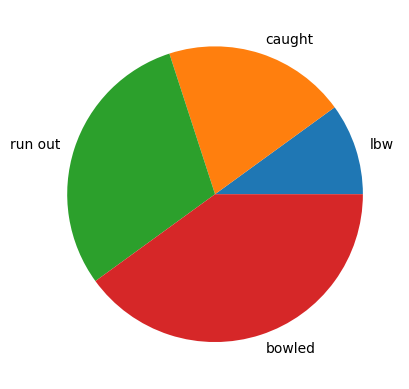

In [129]:
dataFrame = pd.DataFrame({
    "dis" : ['lbw','caught','run out','bowled'],"cou" : [1,2,3,4]
})
plt.pie(dataFrame["cou"], labels = dataFrame["dis"])

In [144]:
# Averages
runs = df["Runs"]
l=list(runs)
print("Average Runs:",round((sum(l)/len(l))))
six  = df["6s"]
l1=list(six)
print("Average sixes:",round((sum(l1)/len(l1))))
fours = df["4s"]
l2=list(fours)
print("Average fours:",round(sum(l2)/len(l2)))

Average Runs: 47
Average sixes: 1
Average fours: 4


In [145]:
# Dataframe conversion
average = {
    'Average Runs' : [47],
    'Average sixes' : [1],
    'Average fours' : [4]
}
df = pd.DataFrame(average)
df

,Average Runs,Average sixes,Average fours
0,47,1,4


In [147]:
print("Maximum runs:",max(l))
print("Maximum sixes:",max(l1))
print("Maximum fours:",max(l2))

Maximum runs: 154
Maximum sixes: 7
Maximum fours: 18


In [149]:
# dataframe conversion
maxi = {
    'Maximum Runs' : [154],
    'Maximum sixes' : [7],
    'Maximum fours' : [18]
}
df = pd.DataFrame(maxi)
df

,Maximum Runs,Maximum sixes,Maximum fours
0,154,7,18
